# Exercise sheet 4
---
**Machine Learning for Physics and Astronomy**

Semester 2, Period 5, 2021/2022

dr. Christoph Weniger, Andrea Visibile, Christiaan van Asperen, Dion Noordhuis, Kamile Lukosiute, Mathis Gerdes, Noemi Anau Montel, Silvia Cassanelli

To be handed in until **11/05/2022** - 15 points in total

---



## Chapter 7: Clustering 


### A. K-Means and EM (9pt)

*Topics: clustering, unsupervised learning*

**Reading Material: Murphy 11.4, and especially 11.4.2 and especially especially 11.4.2.5**

In this exercise, we will be implementing the K-means clustering algorithm by hand. Although efficient algorithms (that you should definitely use for your own projects!) are implemented in `scikit-learn`, sometimes it's helpful to see how things work by writing your own implementation.

We will work with some previously generated data. 


Text(0, 0.5, '$x_2$')

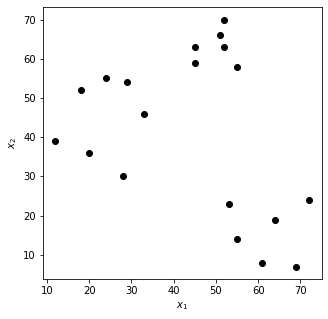

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Some previously geenerated random data in 2 dimensions
data = np.array([ [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
     [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]]).T

fig = plt.figure(figsize=(5, 5))
plt.scatter(data[:,0], data[:,1], color='k')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

1. Take a look at the plot of our datapoints. Generate initial random values for the centroids (means) such that they are randomly distributed throughout the whole data space. Use $k=3$. Your centroids should be stored as a $k \times 2$ numpy arrays, with each row giving the $x_1, x_2$ values of the centroid. Plot a scatter plot of the data along with your centroids in red, green, and blue. (2pt)

Text(0, 0.5, '$x_2$')

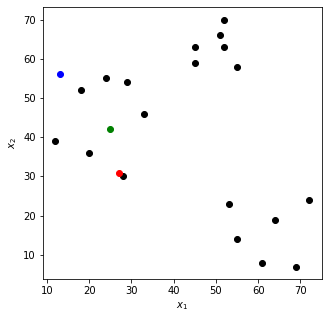

In [103]:
k = 3
random_points = np.random.randint(5, high=75, size=k*2, dtype=int)
centroids = random_points.reshape((k, 2))

fig = plt.figure(figsize=(5, 5))
plt.scatter(data[:,0], data[:,1], color='k')
plt.scatter(centroids[0,0], centroids[0,1], color='r')
plt.scatter(centroids[1,0], centroids[1,1], color='b')
plt.scatter(centroids[2,0], centroids[2,1], color='g')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')


2. (Assignment/Expectation) Define the function `closest_centroid`, which should return an array giving the index (0, 1, or 2) of the closest centroid for each datapoint. This function will tell us which centroid is closest. This function plays the same role as 

$$r_{n k}=\left\{\begin{array}{ll}
1 & \text { if } k=\arg \min _{j}\left\|\mathbf{x}_{n}-\boldsymbol{\mu}_{j}\right\|^{2} , \\
0 & \text { otherwise } .
\end{array}\right.$$

(although returning directly $k$, not the one-hot encoding).

Hint: `np.argmin` could be useful here. (2pt)



In [104]:
def closest_centroid(k, data, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    
    # add first array of distances to the first centroid
    # so we can join the distances to the other centroids
    distance_squared_0 = np.sum((data-centroids[0])**2,axis=1)
    distance_squared_0 = distance_squared_0.reshape(len(distance_squared_0),1)
    total_distances_centroid =np.array(distance_squared_0)

    #loop for other centroids
    for i in range(1, k):
      distance_squared = np.sum((data-centroids[i])**2,axis=1)
      distance_squared = distance_squared.reshape(len(distance_squared),1)
      total_distances_centroid = np.append(total_distances_centroid,distance_squared, axis=1)

    #determine for each point which centroid is closest
    closest_to_centroid = np.argmin(total_distances_centroid, axis=1)

    return closest_to_centroid

points_to_centroid = closest_centroid(k, data, centroids)

3. (Moving Centroids/Maximization) Define the function `move_centroids` which should return the new values of the means i.e. centroids, given the previous assignments. This function is equivalent to
$$\boldsymbol{\mu}_{k}=\frac{\sum_{n} r_{n k} \mathbf{x}_{n}}{\sum_{n} r_{n k}}.$$ (1pt)

In [105]:
def move_centroids(data, closest, k):
    """returns the new centroids assigned from the points closest to them"""
    
    #dictionary for with the centroids and which points belong to them
    arg_closest = {}
    
    for i in range(0, k):
      arg_closest_i = np.argwhere(closest==i)
      arg_closest[i] = arg_closest_i

    #determine the average x and y coordinate of all the points belonging to
    #the centroid. This average is the place of the centroid.
    centroids = np.array([])
    for i in range(0, k):
      centroid = sum(data[arg_closest[i],0])/len(arg_closest[i]), sum(data[arg_closest[i],1])/len(arg_closest[i])
      centroids = np.append(centroids, centroid)

    centroids = centroids.reshape(k,2)
    return centroids


4. (Iteration) Now we are ready to put our E and M steps together. Decide on a termination criterion, and run your training. This should be only a few steps. At each training step, visualize the assignments of the data points to their respective centroid in plots. (2pt)

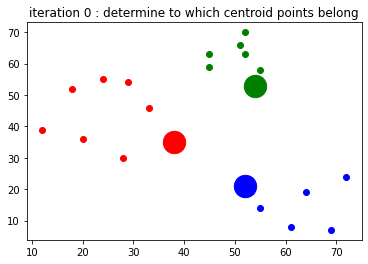

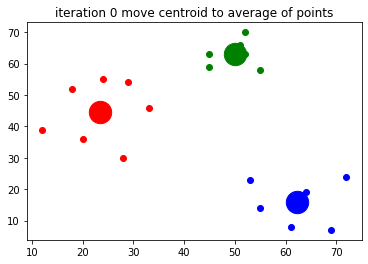

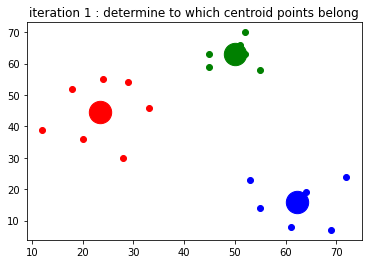

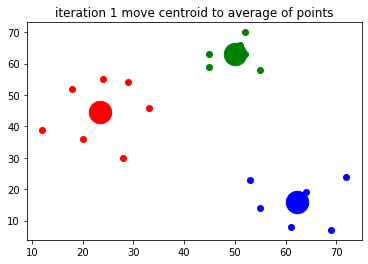

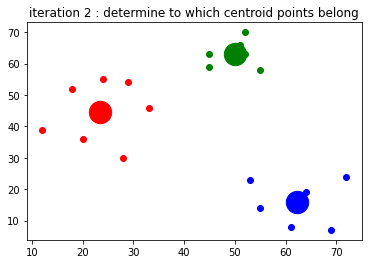

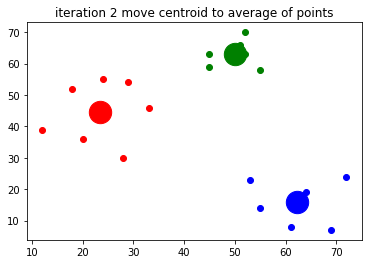

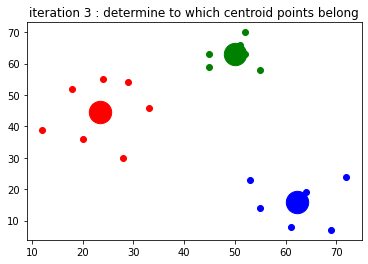

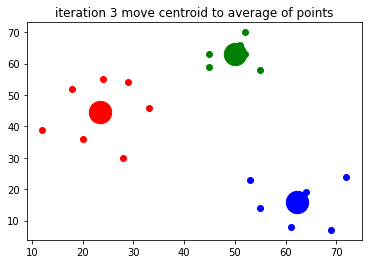

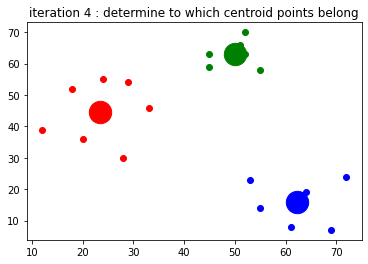

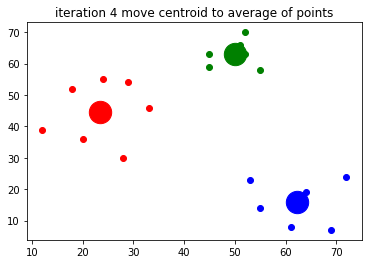

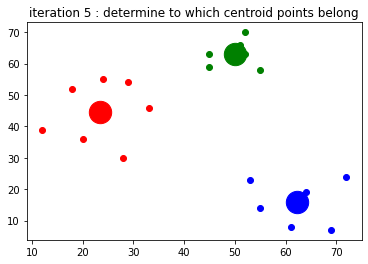

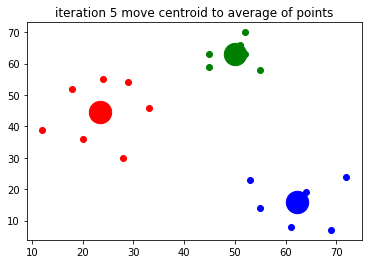

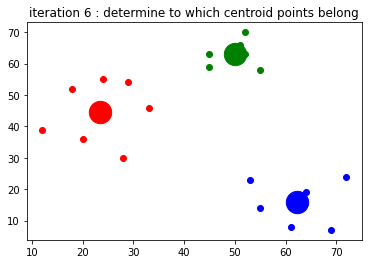

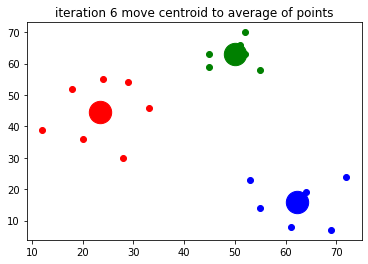

In [106]:
k = 3
random_points = np.random.randint(20, high=60, size=k*2, dtype=int)
centroids = random_points.reshape((k, 2))
for i in range(7):
  #determine to which centroid the points belong
  points_to_centroid = closest_centroid(k, data, centroids)
  points_to_centroid = np.array(points_to_centroid)

  #make a dictionary with the centoid and beloning points
  arg_closest = {} 
  for j in range(k):
    arg_closest_j = np.argwhere(points_to_centroid==j)
    arg_closest[j] = arg_closest_j

  #plot the centroid and beloning points in the same color
  colours = ['r', 'g', 'b', 'y', 'c', 'm']
  for x in range(k):
    plt.scatter(data[arg_closest[x],0], data[arg_closest[x],1],color=colours[x])
    plt.scatter(centroids[x,0], centroids[x,1],s=500,color=colours[x])
  
  plt.title('iteration %i : determine to which centroid points belong' %i)
  plt.show()

  #determine where the centroid should be placed at
  centroids = move_centroids(data, points_to_centroid, k)

  ##plot the centroid and beloning points in the same color
  for y in range(k):
    plt.scatter(data[arg_closest[y],0], data[arg_closest[y],1],color=colours[y])
    plt.scatter(centroids[y,0], centroids[y,1],s=500,color=colours[y])

  plt.title('iteration %i move centroid to average of points' %i)
  plt.show()

5. Discuss briefly when the algorithm does or does not converge. (1 pt)

The K-means algorithm converges when the data points are completely grouped into correct clusters. When the centroids remain in the same place for 2 iterations the algorithm is converged, which can be seen above. The K-means algorithm is guarenteed to converges, but it is possible to converge to a local minimum instead of the global minimum. It can converge to a local minimum when for example the data contains outliers or the density spread of data points is different across the data space.


6. Now load the data below and run your K-means algorithm again for $k=3$. Do you obtain good results? How would a method using Gaussian mixture models perform differently? (1 pt)

In [107]:
!wget https://raw.githubusercontent.com/ChristiaanvA/ml4pha_datasets/main/data_mouse.csv

--2022-05-10 15:35:06--  https://raw.githubusercontent.com/ChristiaanvA/ml4pha_datasets/main/data_mouse.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99600 (97K) [text/plain]
Saving to: ‘data_mouse.csv.3’

data_mouse.csv.3    100%[===================>]  97.27K  --.-KB/s    in 0.01s   

2022-05-10 15:35:07 (6.65 MB/s) - ‘data_mouse.csv.3’ saved [99600/99600]



Text(0, 0.5, '$x_2$')

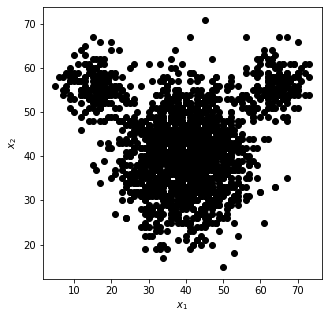

In [108]:
data_mouse = pd.read_csv('/content/data_mouse.csv')
data_mouse = data_mouse.to_numpy()

fig = plt.figure(figsize=(5, 5))
plt.scatter(data_mouse[:,0], data_mouse[:,1], color='k')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

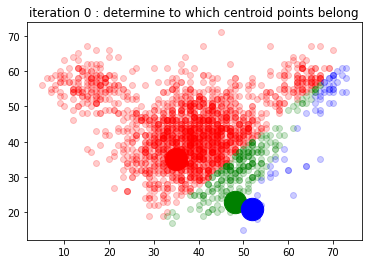

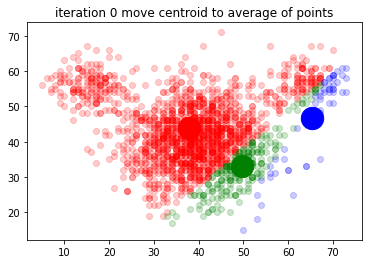

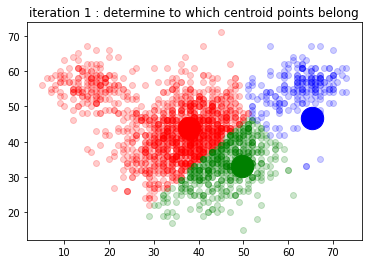

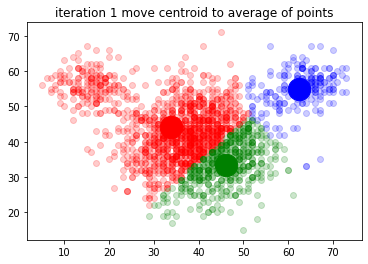

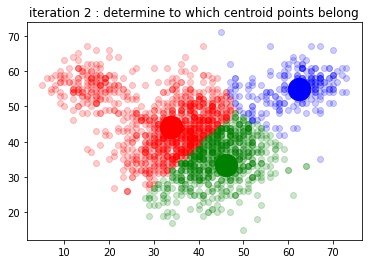

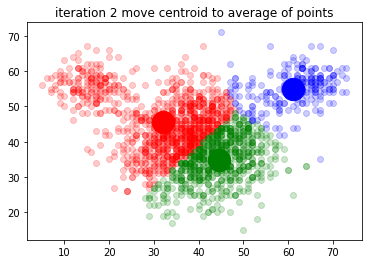

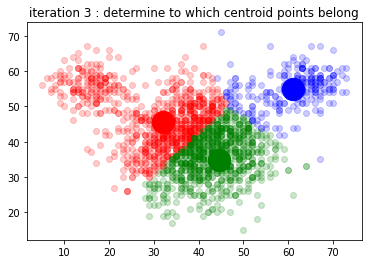

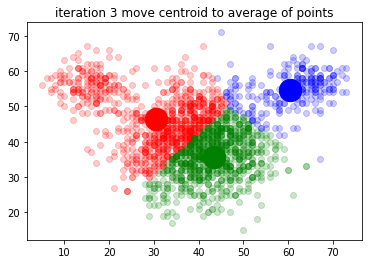

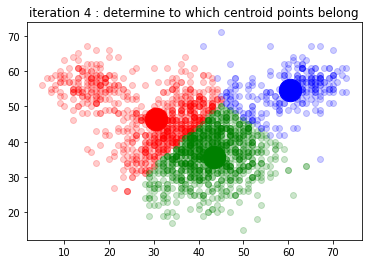

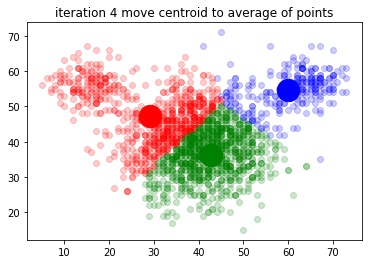

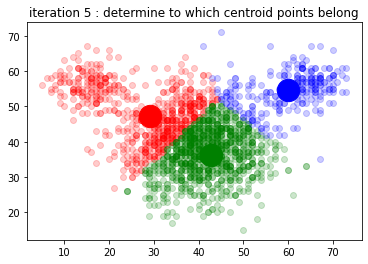

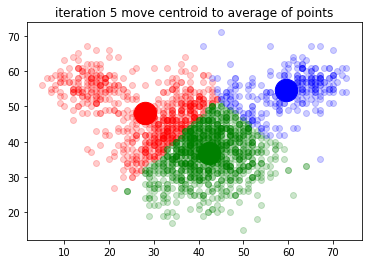

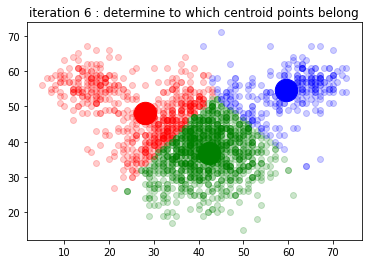

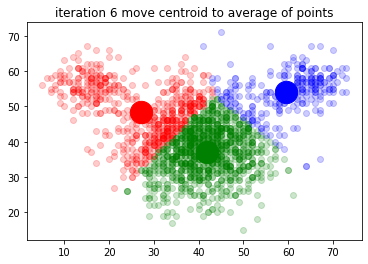

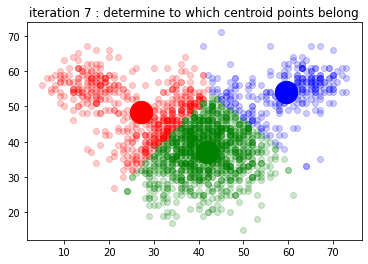

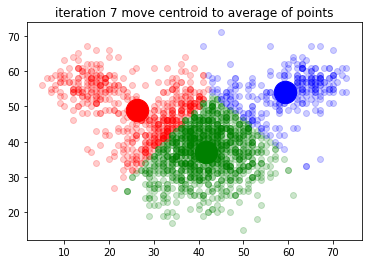

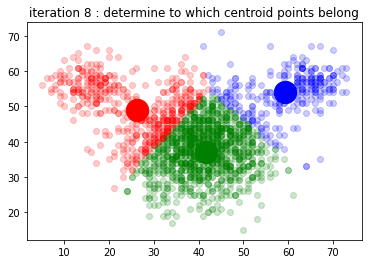

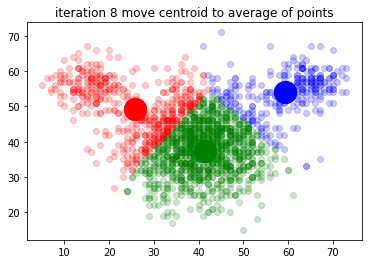

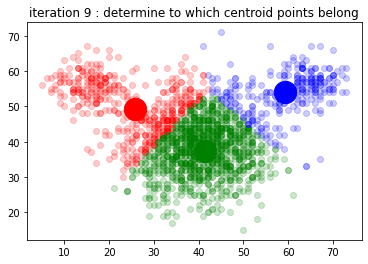

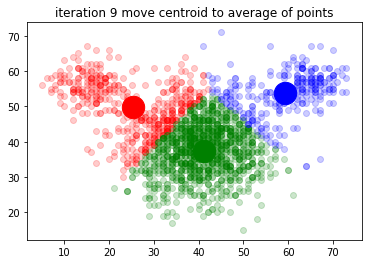

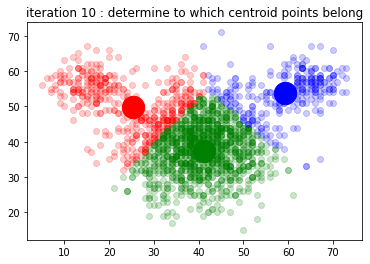

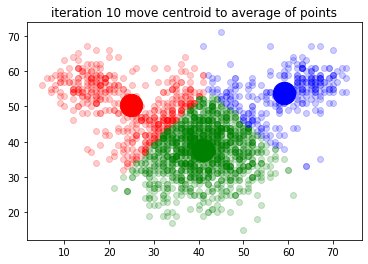

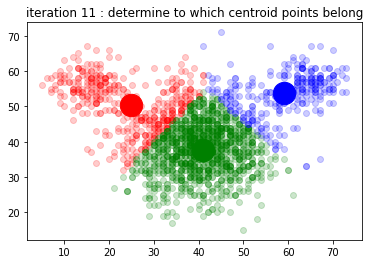

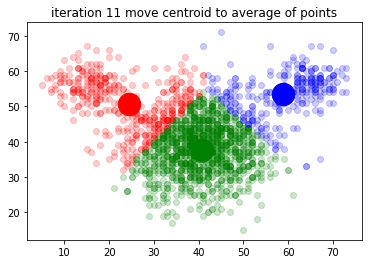

In [109]:
k = 3
random_points = np.random.randint(20, high=60, size=k*2, dtype=int)
centroids = random_points.reshape((k, 2))
for i in range(12):
  #determine to which centroid the points belong
  points_to_centroid = closest_centroid(k, data_mouse, centroids)
  points_to_centroid = np.array(points_to_centroid)

  #make a dictionary with the centoid and beloning points
  arg_closest = {}  
  for j in range(k):
    arg_closest_j = np.argwhere(points_to_centroid==j)
    arg_closest[j] = arg_closest_j

  #plot the centroid and beloning points in the same color
  colours = ['r', 'g', 'b', 'y', 'c', 'm']
  for x in range(k):
    plt.scatter(data_mouse[arg_closest[x],0], data_mouse[arg_closest[x],1],color=colours[x], alpha=0.2)
    plt.scatter(centroids[x,0], centroids[x,1],s=500,color=colours[x])
  
  plt.title('iteration %i : determine to which centroid points belong' %i)
  plt.show()

  #determine where the centroid should be placed at
  centroids = move_centroids(data_mouse, points_to_centroid, k)

  #plot the centroid and beloning points in the same color
  for y in range(k):
    plt.scatter(data_mouse[arg_closest[y],0], data_mouse[arg_closest[y],1],color=colours[y], alpha=0.2)
    plt.scatter(centroids[y,0], centroids[y,1],s=500,color=colours[y])

  plt.title('iteration %i move centroid to average of points' %i)
  plt.show()

Yes, it converges and the data looks to be grouped correctly when it converges (even though in the start the centroids where placed totally at the wrong place).

How would a method using Gaussian mixture models perform differently? 

One of the important differences between both methods is the shape of the decision boundaries. In GMs it is more flexible and with the covariance matrix we can make the boundaries more elliptical as compared to the ciricular boundaries with K means.



## Recap Chapter 6: More on logistic regression

### A. Logistic Regression With PyTorch (1 point)

Numpy is a great framework for general scientific computing, but it cannot utilize GPUs to accelerate numerical computations nor is it ideal for machine learning specific tasks. We will therefore use Pytorch, a widely used deep learning package. In fact, logistic regression can be seen as the minimal example of a neural network: it consist of a single neuron with a sigmoid activation function. You will learn more about neural networks later in the course. \\
The most important basic concept is that a Pytorch tensor is the same as a numpy array. In this worked out example we will implement logistic regression in Pytorch in the setting of the regession assignment of exercise sheet 3. You are ecouraged to run the following example and examine carefully each step as this will be an important reference to the next exercises. The following basic [tutorials](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html) might be helpful to better understand Pytorch.

To train any Pytorch ML model, we need four things: a model definition, a criterion (a loss function), an optimizer (gradient descent for now; we will talk about other optimizers later), and a training routine.

First let's define the model, which we write as a class that inherits from `torch.nn.Module`. We will need one [linear](https://pytorch.org/docs/stable/nn.html#torch.nn.Linear) layer. Skim the Linear layer reference material. This time we do not need to worry about implementing basis functions, since the `torch.nn.Linear()` does this for us. The `forward` function simply computes the value of the prediction `y` given the model parameters. We will talk about why this is called "forward" later in the course.

In [110]:
import torch

In [111]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(2,1)

    def forward(self,x):
        y = torch.sigmoid(self.linear(x))
        return y

Defining the criterion and optimizer is a little bit easier because there are quite a few standard ones. Use the built-in torch functions to define a binary cross-entropy loss. \\
We implement batch gradient descent through torch.optim.SGD. This will implement gradient descent on the batch the model receives, since we are passing the whole dataset at once there is nothing stochastic in our case.



In [112]:
model = LogisticRegression()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

1. Let us first obtain our data from the logistic regression assignment from exercise sheet 3 again and process it as before. You can use your answers to problems 2 and 3 from last sheet for this. (1 pt)

In [113]:
# Import training data
# This will donwload the training data to the virtual colab data folder
# Colab deletes the stored files every time you close your browser, so make sure to run this cell every time
!wget https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv


--2022-05-10 15:35:12--  https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 418121 (408K) [text/plain]
Saving to: ‘01_heights_weights_genders.csv.3’

01_heights_weights_ 100%[===================>] 408.32K  --.-KB/s    in 0.04s   

2022-05-10 15:35:12 (11.3 MB/s) - ‘01_heights_weights_genders.csv.3’ saved [418121/418121]



In [114]:

# Read training data
# Now you have access to the label T (0 for Male, 1 for Female), height, and weight for 10,000 data points 
data = pd.read_csv("01_heights_weights_genders.csv")
T = np.array([0. if x=='Male' else 1. for x in data['Gender'].values])
H = data['Height'].values
W = data['Weight'].values

T = T.reshape(10000, 1)

#standardize
H_scaled = (H-H.mean())/np.std(H)
W_scaled = (W-W.mean())/np.std(W)

data['H-scaled'] = H_scaled
data['W-scaled'] = W_scaled

W_scaled_array = np.array(data['W-scaled']).reshape((10000,1))
H_scaled_array = np.array(data['H-scaled']).reshape((10000,1))
H_W_scaled = np.concatenate((W_scaled_array, H_scaled_array), axis=1)
X = np.array(H_W_scaled)

Everything in torch needs to be a tensor - *including our dataset.*

In [115]:
X_tensor = torch.from_numpy(X).to(torch.float)
T_tensor = torch.from_numpy(T).to(torch.float)

Now let's define the training routine. A key point about Pytorch is that it has two modes: training and evaluation. In training mode, the parameters of the model are allowed to be iteratively changed. In evaluation mode, they are fixed. Whenever you are plotting or calling the model to make predictions, make sure to call `model.eval()` beforehand. Before training, call `model.train()`. 

`model.train()` is the first step in the training routine. 
Then, we define a loop that does the following things:

- Zero's the gradient. This is important because the gradient of the loss function is what is updating our model weights. We don't want this to be accidentally doing weird things and then the wrong values update our weights.
- Call the model on our X values to make predictions.
- Evaluate the predictions using the loss.
- Evaluate the gradient of the loss (this is known as the *backward* pass; we will discuss why this is called this when we get to neural networks).
- Take an optimizer step.

In [116]:
model.train()

for epoch in range(30000):
    optimizer.zero_grad()

    # forward pass
    Y_pred = model(X_tensor)

    # compute loss
    loss = criterion(Y_pred, T_tensor)
    if epoch% 1000 == 0:
        print(loss.item())
    # backward pass
    loss.backward()
    optimizer.step()

0.5431005358695984
0.28873082995414734
0.2674061059951782
0.2581152021884918
0.25193217396736145
0.24710194766521454
0.24307212233543396
0.2396104782819748
0.236594095826149
0.2339446097612381
0.23160524666309357
0.22953172028064728
0.2276877462863922
0.22604309022426605
0.22457221150398254
0.2232532948255539
0.22206780314445496
0.22099976241588593
0.22003528475761414
0.21916267275810242
0.21837148070335388
0.21765285730361938
0.21699891984462738
0.21640285849571228
0.21585869789123535
0.2153611034154892
0.21490558981895447
0.21448783576488495
0.21410439908504486
0.213751882314682


Congratulations on training your first PyTorch model! :) Lastly, let's plot probabilistic predictions for each datapoint.

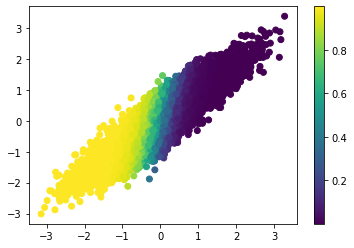

In [117]:
model.eval()
c = [model(torch.tensor([h, w], dtype=torch.float)).detach().numpy() for h, w in zip(H_scaled, W_scaled)]

plt.scatter(H_scaled, W_scaled, c =c)
plt.colorbar()

### B. Star, Galaxy, or Quasar? (5 points)

A shortened version of what was in HW3. The data-processing part is dropped, you are only requested to do the PyTorch part. This will be a useful preparation for training neural networks in the rest of the course.

![alt text](https://www.sdss.org/wp-content/uploads/2014/05/segue.jpg)


In this problem, we will be extending our Pytorch logististic regression model to predict whether an observed object is a star, galaxy, or quasar.

**The Data**

We will be using data collected by the Sloan Digital Sky Survey ([SDSS](http://www.sdss.org/)) and released as part of Data Release 14. SDSS is a multi-spectral and spectroscopic survey telescope at Apache Point Observatory in New Mexico, USA. 

The telescope uses a camera of 30 CCDs which observe in different optical filter bands (u,g,r,i,z). The data used here is freely publicly available. 

Therefore we will be importing a table of 10,000 objects, for each of which we have the following information:
- class = tells us whether the object is a GALAXY, STAR, or QSO ("quasi-stellar object" or [quasar](https://en.wikipedia.org/wiki/Quasar))
- ra = [Right Ascension](https://en.wikipedia.org/wiki/Right_ascension)
- dec = Declination 
- [redshift](https://en.wikipedia.org/wiki/Redshift)


Magnitude in each of the following [filters](http://skyserver.sdss.org/dr1/en/proj/advanced/color/sdssfilters.asp):
- u
- g
- r
- i
- z

We will not be needing almost any of the imaging data, so you don't need to understand how SDSS works, but if you're curious, you can read about it [here](http://www.sdss3.org/dr9/imaging/imaging_basics.php). 

The data you will be using in this exercise has already been preprocessed in the following ways:
- The 'class' feature has been converted to a set of labels (target array) `T`. Here, 0, 1, and 2 correspond to STAR, GALAXY, and QUASAR respectively.
- The rest of the features have been converted to a scaled array `X`.

Run the code below to load the data.

In [118]:
# Let's import the processed data
!wget https://raw.githubusercontent.com/ChristiaanvA/ml4pha_datasets/main/Skyserver_SQL_labels.csv
!wget https://raw.githubusercontent.com/ChristiaanvA/ml4pha_datasets/main/Skyserver_SQL_features.csv

--2022-05-10 15:35:31--  https://raw.githubusercontent.com/ChristiaanvA/ml4pha_datasets/main/Skyserver_SQL_labels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250000 (244K) [text/plain]
Saving to: ‘Skyserver_SQL_labels.csv.3’

Skyserver_SQL_label 100%[===================>] 244.14K  --.-KB/s    in 0.03s   

2022-05-10 15:35:31 (7.69 MB/s) - ‘Skyserver_SQL_labels.csv.3’ saved [250000/250000]

--2022-05-10 15:35:31--  https://raw.githubusercontent.com/ChristiaanvA/ml4pha_datasets/main/Skyserver_SQL_features.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

In [119]:
T = pd.read_csv('/content/Skyserver_SQL_labels.csv').to_numpy().flatten()
X = pd.read_csv('/content/Skyserver_SQL_features.csv').to_numpy()

Now the data processing step: we will need a subset of the data to impartially evaluate the performance of our classifier. 

1. (1 points) $$\\ $$ First, shuffle your X and T arrays, in such a way that each row still corresponds to each row! Split your target array `T` into two arrays: `T_train` and `T_test` and corresponding two `X_train` and `X_test` arrays, where the train test contains 90% of the datapoints and the test dataset contains 10% of the datapoints.

In [120]:
#shuffled
shuffler = np.random.permutation(len(X))
T = T[shuffler]
X = X[shuffler]


from sklearn.model_selection import train_test_split
X_train, X_test, T_train2, T_test = train_test_split(X, T, test_size=0.1)
#X_train and T_train to train model, X_test and T_test to test the model, X are features and T are the labels

#to get 3 columns dummy columns which we use later in the midel
T_train = pd.get_dummies(T_train2).to_numpy()



2. (0.5 points) $$\\ $$ Now we are ready to move onto the Pytorch part of the exercises. As in the exercises, convert your train and test arrays to torch tensors.

In [121]:

X_train_tensor = torch.from_numpy(X_train).to(torch.float)
X_test_tensor = torch.from_numpy(X_test).to(torch.float)
T_train_tensor = torch.from_numpy(T_train).to(torch.float)
T_test_tensor = torch.from_numpy(T_test).to(torch.float)


3. (1.5 points) $$\\ $$  Extend your code for the Logistic Regression Pytorch model from the exercises for multiclass classification with more than two input parameters. Train your code again with the  cross entropy loss, using the SGD optimizer. You can use 15000 steps and a learning rate 0.02 as a starting point.

In [122]:
class LogisticRegression2(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression2, self).__init__()
        self.linear = torch.nn.Linear(8,3)

    def forward(self,x):
        y = torch.sigmoid(self.linear(x))
        return y

model2 = LogisticRegression2()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.02)

model2.train()

for epoch in range(30000):
    optimizer.zero_grad()

    # forward pass
    Y_pred2 = model2(X_train_tensor)

    # compute loss
    loss = criterion(Y_pred2, T_train_tensor)
    if epoch% 1000 == 0:
        print(loss.item())
    # backward pass
    loss.backward()
    optimizer.step()

0.7989084124565125
0.4231838583946228
0.36614906787872314
0.3415525257587433
0.3269985020160675
0.3167966604232788
0.30888041853904724
0.30233243107795715
0.2966870665550232
0.29168352484703064
0.2871655225753784
0.28302934765815735
0.27920714020729065
0.27565014362335205
0.2723189890384674
0.269187331199646
0.2662311792373657
0.2634345293045044
0.2607799470424652
0.25825560092926025
0.2558495104312897
0.25355446338653564
0.25135937333106995
0.2492598295211792
0.24724717438220978
0.24531595408916473
0.24346284568309784
0.24168089032173157
0.2399662435054779
0.23831616342067719


In [123]:
model2.eval()


LogisticRegression2(
  (linear): Linear(in_features=8, out_features=3, bias=True)
)


Although we aim to minimize the loss function, it hardly tells us as humans how well the classification scheme is performing. To get a better understanding of performance, we look at *accuracy*, or the fraction of correct predictions from total predictions. 

4. (2 points) $$\\ $$ Define the function `accuracy` which takes as inputs the targets and the predictions by the model and use it to evaluate the accuracy of our logistic regression model on the train and test datasets.

In [124]:
def accuracy(pred, actual):
  pred = np.argmax(pred, axis=1)
  right_wrong = actual==pred
  count_right = np.count_nonzero(right_wrong)
  accuracy = count_right/len(right_wrong)
  return accuracy

Y_pred2 = Y_pred2.detach().numpy()
print('accuracy training data', accuracy(Y_pred2, T_train2))

Y_pred3 = model2(X_test_tensor)
Y_pred3 = Y_pred3.detach().numpy()
print('accuracy test data', accuracy(Y_pred3, T_test))

accuracy training data 0.882542504722747
accuracy test data 0.891
